# Camera Calibration

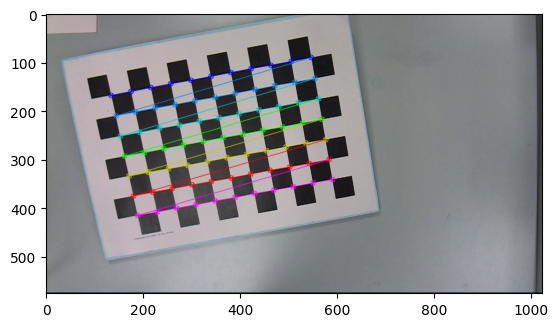

Camera matrix [[1.47837178e+03 0.00000000e+00 5.49296803e+02]
 [0.00000000e+00 1.50368179e+03 3.49725825e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Dist Coeff:  [[ 9.87445146e-02 -2.00989190e+00 -5.98091569e-03  1.82257574e-03
   7.03149809e+00]]


In [14]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

grid_size = (11, 7)

square_size = 3

obj_points = np.zeros((grid_size[0] * grid_size[1], 3), np.float32)

obj_points[:, :2] = np.mgrid[0:grid_size[0], 0:grid_size[1]].T.reshape(-1, 2) * square_size
# mgrid is numpy function to create multi dimensional grid structures 

object_points = []
image_points = []

images = glob.glob('calibration_images/*.png')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, grid_size, None)

if ret:
    object_points.append(obj_points)
    image_points.append(corners)

cv2.drawChessboardCorners(img, grid_size, corners, ret)
# cv2.imshow('Chessboard Corners', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(img)
plt.show()

ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, gray.shape[::-1], 
                                                                   cameraMatrix = None, distCoeffs = None, criteria=None)
np.savez('calibration_data.npz', cameraMatrix = camera_matrix, distCoeffs = dist_coeffs)

print("Camera matrix", camera_matrix)
print("Dist Coeff: ", dist_coeffs)